In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_projection_benchmarks, do_selection_benchmarks, do_join_benchmarks
import matplotlib
import statistics

from mlinspect.utils import get_project_root

Defined plot_runtimes, example output:


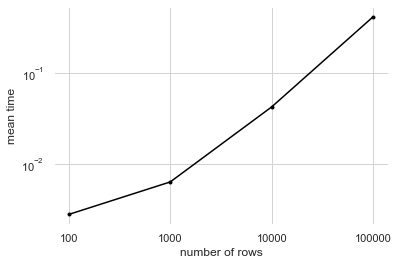

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #major_ticks = np.arange(0, 10, 3)
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


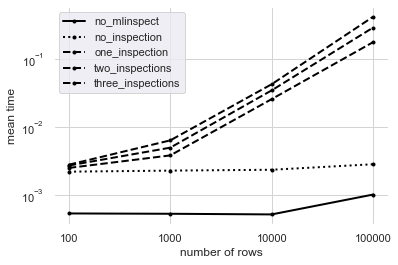

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

In [4]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

projection_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_projection_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = projection_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        projection_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in projection_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0005955671999999801, 0.000510441799999839, 0.0006404037999999445, 0.0007921517999999849]
no inspection: [0.0028845268000001313, 0.00214831180000008, 0.002578681000000138, 0.0023762425999997562]
one inspection: [0.0026797337999999726, 0.003640345999999894, 0.018661369000000327, 0.17757622139999985]
two inspections: [0.00247224459999984, 0.004936171599999995, 0.029794570399999998, 0.28737047700000035]
three inspections: [0.00264751359999984, 0.007807824000000174, 0.03998124600000015, 0.3768077444000003]


Projection results


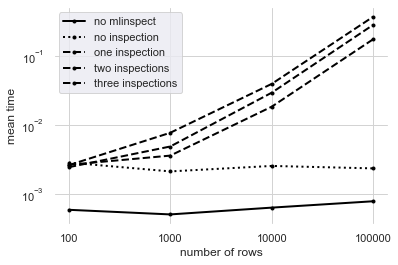

In [5]:
print('Projection results')

projection_linestyles = {"no mlinspect": "solid", 
             "no inspection": "dotted", 
             "one inspection": "dashed", 
             "two inspections": "dashed", 
             "three inspections": "dashed"}

plot_runtimes_all(row_numbers, projection_mean_benchmark_results, projection_linestyles, 'all_runtimes_projection')

In [6]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

selection_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_selection_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = selection_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        selection_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in selection_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0004974842000002866, 0.00040331360000038784, 0.0005806796000001668, 0.0030542101999998295]
no inspection: [0.006294689399999953, 0.004909167000000281, 0.006166834200000082, 0.027627783800000215]
one inspection: [0.009591100999999824, 0.010701884999999934, 0.046020211599999784, 0.3276744178000005]
two inspections: [0.009866758600000126, 0.012676011799999998, 0.07347528239999938, 0.49113844100000037]
three inspections: [0.008918863400000986, 0.015341155599999467, 0.07673335660000014, 0.6252152517999996]


Selection results


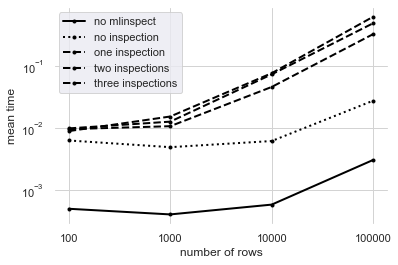

In [7]:
print('Selection results')

plot_runtimes_all(row_numbers, selection_mean_benchmark_results, projection_linestyles, 'all_runtimes_selection')

In [8]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

join_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_join_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = join_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        join_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in join_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.001774968600000193, 0.0016875702000007208, 0.0032872580000002927, 0.01681429359999953]
no inspection: [0.006162373199998683, 0.00590491199999974, 0.010166638400000493, 0.055291401000000205]
one inspection: [0.014402866199999665, 0.01764359760000005, 0.05180975900000036, 0.4246453144000014]
two inspections: [0.014010340999999472, 0.01826422939999901, 0.06885194540000086, 0.5683329346000008]
three inspections: [0.014031357000000355, 0.020013103600000904, 0.08548584300000073, 0.7192882699999998]


Join results


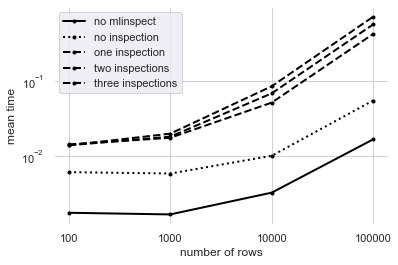

In [9]:
print('Join results')

plot_runtimes_all(row_numbers, join_mean_benchmark_results, projection_linestyles, 'all_runtimes_selection')